In [1]:
from src.utils.data_utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [35]:
# load breweries file
breweries_df = pd.read_csv("data/clean/BeerAdvocate/breweries.csv")


In [2]:

# load rating to know when was the first rating
ba_usa_ratings = pd.read_csv("data/clean/BeerAdvocate/usa_ratings.csv")
ba_usa_ratings['date'] = ba_usa_ratings['date'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).date())

In [7]:
ba_usa_ratings.head(5)

,Unnamed: 0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,...,taste,overall,rating,user_name_nan,abv_nan,appearance_nan,aroma_nan,palate_nan,taste_nan,overall_nan
0,0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,2015-08-20,nmann08,nmann08.184925,...,2.75,3.0,2.88,0,0,0,0,0,0,0
1,1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,2009-02-20,StJamesGate,stjamesgate.163714,...,4.00,3.5,3.67,0,0,0,0,0,0,0
2,5,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2014-12-01,Hellpop65,hellpop65.48993,...,0.00,0.0,3.25,0,0,1,1,1,1,1
3,6,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2014-05-29,Latarnik,latarnik.52897,...,0.00,0.0,3.50,0,0,1,1,1,1,1
4,7,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,2014-02-26,RochefortChris,rochefortchris.697017,...,0.00,0.0,3.50,0,0,1,1,1,1,1


In [37]:
def breweries_first_date(reviews_df, brew_df):
    rev = reviews_df.loc[:, ['brewery_id', 'date']].sort_values('date').drop_duplicates(subset=['brewery_id'])
    print(rev)
    num_not_rated_us = 0
    #breweries_df['first_rev'] = None
    #breweries_df['first_rev'] = breweries_df.apply(lambda x: rev[rev['brewery_id'] == x.id]['date'], axis=1)

    # breweries_df
    # for index, brewery in brew_df.iterrows():
    #     try:
    #         brew_df.loc[index, 'first_rev'] = rev[rev['brewery_id'] == brewery['id']]['date'].values[0]
    #     except IndexError:
    #         num_not_rated_us += 1

    brew_df['first_rev']=brew_df['id'].map(dict(zip(rev.brewery_id,rev.date)))  # .fillna(0).astype(int)

    brew_df['year_month'] = pd.to_datetime(brew_df['first_rev']).dt.to_period('M')
    return num_not_rated_us, brew_df

def monthly_new_breweries(brew_df):
    new_brew = brew_df.value_counts(subset=['year_month'], sort=False).to_frame()
    new_brew['cumulative'] = new_brew['count'].cumsum()
    
    return new_brew

In [38]:
_, new_breweries = breweries_first_date(ba_usa_ratings, breweries_df)
brew_world = monthly_new_breweries(new_breweries)
brew_us = monthly_new_breweries(new_breweries[new_breweries['location'].str.contains("United States")])


         brewery_id        date
2502905          33  1996-08-22
2445644          35  1998-01-10
783275          144  1998-01-13
5464548         139  1998-01-21
34094           138  1998-01-22
...             ...         ...
6377189       48923  2017-07-23
4198913       48194  2017-07-23
3200686       49652  2017-07-24
4916441       48701  2017-07-25
4178923       49123  2017-07-26

[11243 rows x 2 columns]


In [31]:
# reviews per brewery

def reviews_per_brewery(reviews_df, brew_df):
    rev = reviews_df.loc[:, ['brewery_id', 'brewery_name', 'date']].groupby('brewery_name').count()
    #print(rev)
    # player = breweries, selected = cpunt of reviews
    brew_df['review_count']=brew_df['id'].map(dict(zip(rev.brewery_id,rev.date))).fillna(0).astype(int)

    return brew_df

In [40]:
test = reviews_per_brewery(ba_usa_ratings, breweries_df)
test

,Unnamed: 0,id,location,name,nbr_beers,review_count,first_rev,year_month
0,0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5,0,NaN,NaT
1,1,39913,Kyrgyzstan,Arpa (АРПА),1,0,NaN,NaT
2,2,39914,Kyrgyzstan,Bear Beer,4,0,NaN,NaT
3,3,39915,Kyrgyzstan,Blonder Pub,4,0,NaN,NaT
4,4,39916,Kyrgyzstan,Kellers Bier,2,0,NaN,NaT
...,...,...,...,...,...,...,...,...
16753,16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6,128,2001-01-05,2001-01
16754,16754,5023,Aruba,Aruba Brewing,0,0,NaN,NaT
16755,16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491,0,NaN,NaT
16756,16756,16186,"United States, North Carolina",Triangle Brewing Company,20,0,2007-10-18,2007-10


Text(0, 0.5, 'Number of breweries')

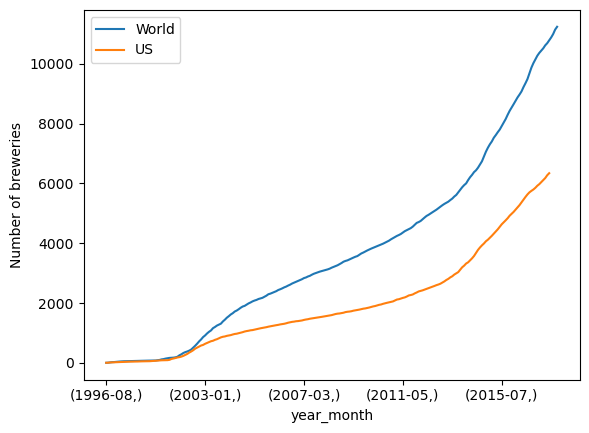

In [39]:

fig, ax = plt.subplots(1, 1)
brew_world['cumulative'].plot(ax=ax, label='World')
brew_us['cumulative'].plot(ax=ax, label='US')
ax.legend()
ax.set_ylabel("Number of breweries")